# Clustering(クラスタリング)

クラスが未知の教師なし学習。<br>
特徴ベクトルの似たかたまりをいくつか作成し区別する。

### クラスター分析の目的
  - データを俯瞰する
  - パターンを特定する

### クラスター分析を用いる例
- マーケットセグメンテーション
- イメージセグメンテーション

## クラスタリングの種類

- 非階層的
    - K近傍法
- 階層的
    - 凝集型（ボトムアップ）
    - 分散型（トップダウン）

## K近傍法(KNN)

1. クラスター内の点の距離を最小化する
1. クラスター間の距離を最大化する

クラスター内の点の距離 => 最小二乗法(WCSS)で求める

［解説］<br>
以下のステップを重心が一定位置に収束するまで繰り返して分類する。<br>

1. シードを与える
1. 各要素とシードとのユークリッド距離を求める<br>
    →各要素は最小の距離となるシードに属する
1. 各クラスター（グループ）の重心を求める

## クラスターの数の決め方

エルボー法を用いて決める。<br>
最大のクラスター数、かつ最小のWCSSが望ましい。

-> [The Elbow Method](#ElbowMethod)

各クラスターに名前(label)を付け、特徴量として管理するため、<br>
labelづけができる最大数をクラスター数とするようエルボー法で探索する。

## 利点・欠点

- 利点<br>
    1. 理解が容易
    1. 処理がはやい
    1. 広く適用可能
    1. 実装が容易
    1. 常に結果が出る

- 欠点<br>
    1. kを決める必要がある<br>
        -> エルボー法で対応
    1. 初期値に影響を受けやすい<br>
        -> K近傍法++で対応(KMeansではデフォルトで実装済み)
    1. 外れ値に影響を受ける<br>
        -> 外れ値を取り除く<br>
        　 一つの点でクラスターが構成されているのだとしたら、それが外れ値である。
    1. 結果が円状になる<br>
        楕円のクラスタリングを構成しにくい<br>
        -> ユークリッド距離を利用することによる結果。外れ値に影響を受けやすい理由。
    1. [標準化](#標準化)

## クラスター分析

### 分析の種類
- 探索的分析<br>
    - データに対する解釈を深める
    - パターンを見つける
- 確認的分析/説明的分析
    - 現象を説明
    - 仮説を確認
    - 前の調査の検証

## Basic of cluster analysis

### Import

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

### Load the data

In [91]:
data = pd.read_csv("./data/Country clusters.csv")

In [13]:
data.shape

(6, 4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Country      6 non-null object
Latitude     6 non-null float64
Longitude    6 non-null float64
Language     6 non-null object
dtypes: float64(2), object(2)
memory usage: 272.0+ bytes


In [12]:
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [16]:
data.describe(include = 'all')

,Country,Latitude,Longitude,Language
count,6,6.000000,6.000000,6
unique,6,NaN,NaN,3
top,UK,NaN,NaN,English
freq,1,NaN,NaN,4
mean,NaN,38.971667,-9.531667,NaN
std,NaN,32.155820,86.523904,NaN
min,NaN,-25.450000,-103.770000,NaN
25%,NaN,45.415000,-73.232500,NaN
50%,NaN,48.950000,-0.065000,NaN
75%,NaN,53.295000,8.400000,NaN


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

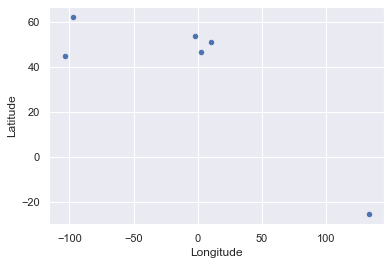

In [24]:
data.plot.scatter(x='Longitude',y='Latitude')

### Select the features

In [92]:
x = data[['Latitude','Longitude']]

In [54]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [93]:
# クラスター数の設定
kmeans = KMeans(3)

In [94]:
kmeans.fit(x)

KMeans(n_clusters=3)

### Clustering results

予測したクラスターを返す<br>
sklearn.cluster.KMeans.fit_predict(x)

In [95]:
identified_clusters = kmeans.fit_predict(x)

In [96]:
identified_clusters

array([2, 2, 1, 1, 1, 0])

In [97]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] =identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

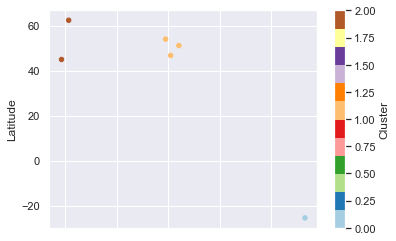

In [107]:
data_with_cluster.plot.scatter(x='Longitude', y='Latitude',c='Cluster',cmap="Paired")

## Cluster analysis for categorical data

### Import

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

### Load the data

In [191]:
data = pd.read_csv("./data/Country clusters.csv")

### Map the data

In [192]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Selected the features

In [195]:
x = data_mapped[['Language']]

In [196]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### Clustering

In [197]:
# クラスター数の設定
kmeans = KMeans(2)
# kmeans = KMeans(n_clusters=4, random_state=0)

In [198]:
kmeans.fit(x)

KMeans(n_clusters=2)

### Clustering results

予測したクラスターを返す<br>
sklearn.cluster.KMeans.fit_predict(x)

In [199]:
identified_clusters = kmeans.fit_predict(x)

In [200]:
identified_clusters

array([1, 1, 0, 1, 0, 1])

In [201]:
data_with_cluster =data_mapped.copy()
data_with_cluster['Cluster'] =identified_clusters
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


c:\users\sirec\anaconda3\envs\datascience\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sirec\anaconda3\envs\datascience\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\sirec\anaconda3\envs\datascience\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\users\sirec\anaconda3\envs\datascience\lib\s

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

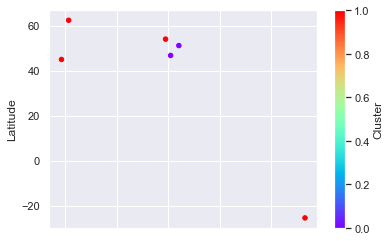

In [202]:
data_with_cluster.plot.scatter(x='Longitude', y='Latitude',c='Cluster',cmap="rainbow")

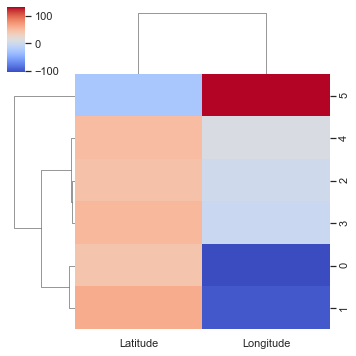

In [229]:
sns.clustermap(x,figsize=(5,5),cmap="coolwarm")

## ElbowMethod

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

sns.set()
%matplotlib inline

### Load the data

In [213]:
data = pd.read_csv("./data/Country clusters.csv")

### Select the features

In [214]:
x = data[['Latitude','Longitude']]

In [215]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### WCSS  
クラスタの二乗和内  
クラスタの結合を測定

In [216]:
kmeans.inertia_

0.0

In [217]:
# WCSSの決定状況を確認する
wcss=[]

for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within_cluster sum of squares')

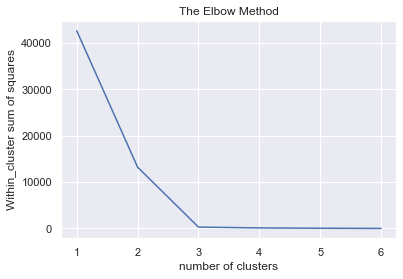

In [218]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('Within_cluster sum of squares')

## 標準化

特徴量として残しておきたい場合は標準化しないこともある。<br>
クラスタリングするにあたり、x軸・y軸が同等の価値があるのであれば標準化すべき。

平均０、分散１のスケールに変換
> sklearn.preprocessing.scale(x)

In [220]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[ 0.20434388, -1.19311447],
       [ 0.79812779, -1.10487004],
       [ 0.26498274,  0.15106214],
       [ 0.51230754,  0.08864535],
       [ 0.41487656,  0.25234699],
       [-2.19463851,  1.80593003]])

kを求める

In [221]:
# WCSSの決定状況を確認する
wcss=[]

for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

#### 次元削減

In [ ]:
# 次元削減
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=0)
x =tsne.fit_transform(store_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] =store_clustering['cluster']
tsne_df.columns = ['axis_0','axis_1','cluster']

tsne_graph = sns.scatterplot(x='axis_0',y='axis_1',hue='cluster',data=tsne_df)

In [ ]:
# クラスタリング
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

data_clustering = analize_order_data.groupby('data_id').agg(['size','mean','median','max','min'])['total_amount']
data_clustering.reset_index(inplace = True,drop=True)

# features
features_x = data_clustering[['size','mean','median','max','min']]

# 標準化
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

# クラスターの数を決定
n_clusters =4

# WCSSの決定状況を確認する
wcss=[]
number_clusters = range(1,n_clusters)
for i in number_clusters:
    kmeans=KMeans(i)
    kmeans.fit(features_x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('Within_cluster sum of squares')
plt.show()

# KMeans
kmeans = KMeans(n_clusters=n_clusters ,random_state=0)
clusters = kmeans.fit(data_clustering_sc)
data_clustering['cluster']=clusters.labels_

print(data_clustering['cluster'].unique())
print(f'wcss : {wcss}')

data_clustering.head()

# 次元削減
tsne = TSNE(n_components=2,random_state=0)
x =tsne.fit_transform(data_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] =data_clustering['cluster']
tsne_df.columns = ['axis_0','axis_1','cluster']

tsne_graph = sns.scatterplot(x='axis_0',y='axis_1',hue='cluster',data=tsne_df)